## Customer Churn Predictions

Dependencies: <br> 
pandas, numpy, scikit-learn, imbalanced-learn, matplotlib, seaborn, plotly, xgboost, shap, joblib

In [1]:
# Setting random seed 
random_state = 42 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
# Doing a check on the current directory/parent directories for defining the data path 
import os 
print("cwd:", os.getcwd()) 
print("Files here:", os.listdir()) 
print("Parent files:", os.listdir(".."))

cwd: /workspaces/Customer-Churn-Prediction/Notebooks
Files here: ['churn_pred_pipeline.ipynb', 'customer_churn_analyisis.ipynb']
Parent files: ['Data', 'README.md', 'Visuals', '.git', 'demo.ipynb', 'Models', 'Notebooks', 'predict.py', '.venv']


In [4]:
# Updating display options 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None) 

In [5]:
# Loading data 
data_path = "../Data/telco_churn_data.csv"
telco_data = pd.read_csv(data_path)  
print(telco_data.info()) 
print("\n", telco_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking for duplicates (customerID) 
telco_data['customerID'].nunique() == len(telco_data)

True

In [7]:
telco_data.shape 

(7043, 21)

In [8]:
telco_data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
telco_data.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# Renaming columns 
cleaned_data = telco_data.rename(columns={
    'customerID': 'customer_id', 
    'gender': 'gender', 
    'SeniorCitizen': 'senior_citizen', 
    'Partner': 'partner', 
    'Dependents': 'dependents', 
    'tenure': 'tenure', 
    'PhoneService': 'phone_service', 
    'MultipleLines': 'multiple_lines', 
    'InternetService': 'internet_service', 
    'OnlineSecurity': 'online_security', 
    'OnlineBackup': 'online_backup', 
    'DeviceProtection': 'device_protection', 
    'TechSupport': 'tech_support', 
    'StreamingTV': 'streaming_tv', 
    'StreamingMovies': 'streaming_movies',
    'Contract': 'contract', 
    'PaperlessBilling': 'paperless_billing', 
    'PaymentMethod': 'payment_method', 
    'MonthlyCharges': 'monthly_charges', 
    'TotalCharges': 'total_charges', 
    'Churn': 'churn'
})




In [12]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [13]:
# Adjusting total_charges column to numeric 
cleaned_data['total_charges'] = pd.to_numeric(cleaned_data['total_charges'], errors='coerce') 


In [14]:
# Renaming Data Values 
""" 
column: senior_citizen 

    --> Changing to (Yes, No) to match the other columns 
        - Currently has (1, 0)

column: contract 
    
    --> Changing to (month_to_month, one_year, two_year) 
        - Currenty has (Month-to-month, One year, Two year) 

column: payment_method 

    --> Changing to (electronic_check, mailed_check, bank_transfer, credit_card) 
        - Currently has (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) 

"""

# Storing mapping for senior_citizen
senior_citizen_map = {1: "Yes", 0: "No"} 
# Applying mapping 
cleaned_data['senior_citizen'] = cleaned_data['senior_citizen'].map(senior_citizen_map) 

# Storing mapping for contract
contract_map = {
    "Month-to-month": "month_to_month", 
    "One year": "one_year", 
    "Two year": "two_year" 
}
# Applying mapping 
cleaned_data['contract'] = cleaned_data['contract'].map(contract_map) 

# Storing mapping for payment_method 
payment_method_map = {
    "Electronic check": "electronic_check", 
    "Mailed check": "mailed_check", 
    "Bank transfer (automatic)": "bank_transfer", 
    "Credit card (automatic)": "credit_card" 
}
# Applying mapping 
cleaned_data['payment_method'] = cleaned_data['payment_method'].map(payment_method_map)  


# Retaining original values 
reverse_senior_citizen_map = {v: k for k, v in senior_citizen_map.items()} 
# Decoding back 
#data['senior_citizen'] = data['senior_citizen'].map(reverse_senior_citizen_map) 

reverse_contract_map = {v: k for k, v in contract_map.items()} 
# Decoding back 
#data['contract'] = data['contract'].map(reverse_contract_map) 

reverse_payment_method_map = {v: k for k, v in payment_method_map.items()} 
# Decoding back 
#data['payment_method'] = data['payment_method'].map(reverse_payment_method_map) 



In [15]:
print(cleaned_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   object 
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [16]:
# Saving cleaned data to data folder 
def save_data(data: pd.DataFrame, file_name: str): 
    os.makedirs(save_path, exist_ok=True) 
    file_path = os.path.join(save_path, f"{file_name}.csv") 
    data.to_csv(file_path, index=False) 
    print(f"Saved -> {file_path}") 

save_path = "../Data/" 
save_data(cleaned_data, "cleaned_churn_data") 


Saved -> ../Data/cleaned_churn_data.csv


In [16]:
data = cleaned_data.copy() 

### EDA

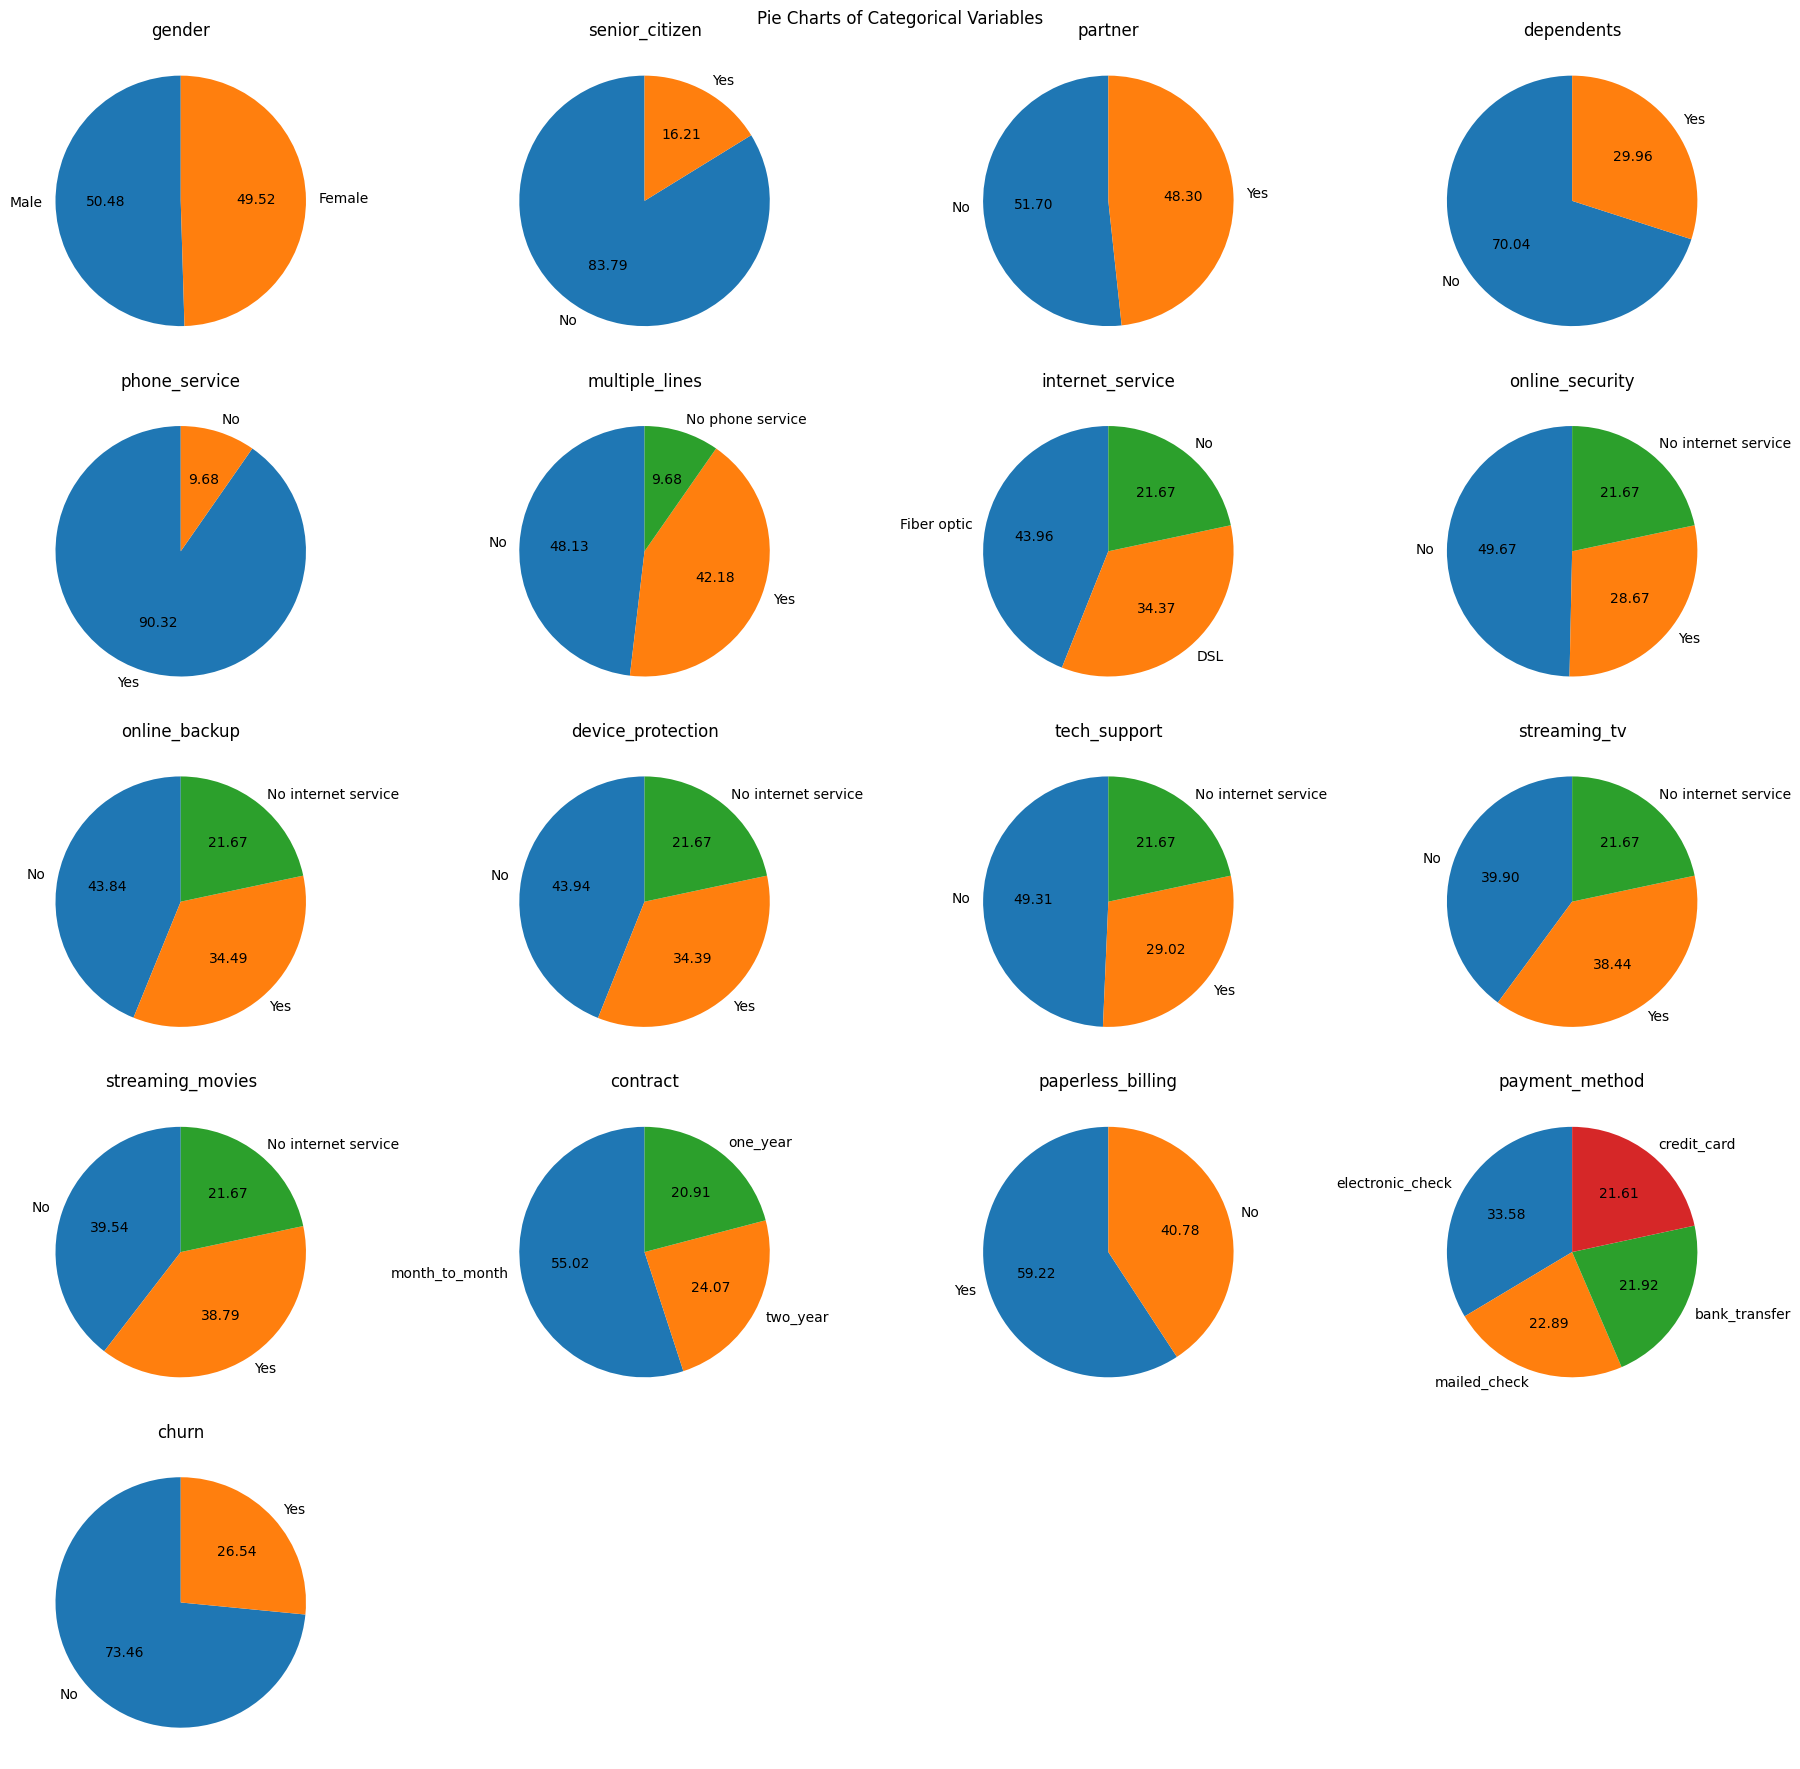

In [17]:
# Function to plot pie charts of the categorical variables in subplots 
def plot_pie_charts(data): 
    # Selecting categorical columns (Except for customer_id) 
    categorical_cols = data.select_dtypes(include=['object']).columns 
    categorical_cols = [col for col in categorical_cols if col.lower() !='customer_id'] 
    total_pie_charts = len(categorical_cols) 

    # Defining subplot layout 
    rows, cols = 5, 4 
    fig, axes = plt.subplots(rows, cols, figsize=(18, 18)) 
    fig.suptitle('Pie Charts of Categorical Variables') 

    # Making it easier to loop 
    axes = axes.flatten() 
    for idx, col in enumerate(categorical_cols): 
        counts = data[col].value_counts() 
        axes[idx].pie(counts, labels=counts.index, autopct="%.2f", startangle=90)
        axes[idx].set_title(col) 

    # Turning off unused subplots 
    for ax in axes[total_pie_charts:]: 
        ax.axis('off') 

    plt.tight_layout() 
    plt.show() 


plot_pie_charts(data) 


In [63]:
# Cross-tabs  
# senior_citizens and churn 
crosstab1 = pd.crosstab(data['senior_citizen'], data['churn'], normalize=True, margins=True) 
print("Senior Citizens/Churn")
crosstab1 


Senior Citizens/Churn


churn,No,Yes,All
senior_citizen,,,
No,0.640068,0.197785,0.837853
Yes,0.094562,0.067585,0.162147
All,0.734630,0.265370,1.000000


In [75]:
# Total number of senior_citizen/non_senior_citizen 
total_senior_citizens = data[data['senior_citizen'] == "Yes"] 
total_non_senior_citizens = data[data['senior_citizen'] == "No"] 
total_senior_citizen_count = data[data['senior_citizen'] == "Yes"].value_counts().sum() 
total_non_senior_citizen_count = data[data['senior_citizen'] == "No"].value_counts().sum() 

# Distribution of senior_citizen_churn/non_senior_citizen_churn within each group 
senior_citizen_churn_count = total_senior_citizens[total_senior_citizens['churn'] == "Yes"].value_counts().sum() 
senior_citizen_churn_pct = senior_citizen_churn_count / total_senior_citizen_count 
non_senior_citizen_churn_count = total_non_senior_citizens[total_non_senior_citizens['churn'] == "Yes"].value_counts().sum() 
non_senior_citizen_churn_pct = non_senior_citizen_churn_count / total_non_senior_citizen_count 

# Distribution of senior citizen churn of total population 
pop_senior_citizen_churn_pct = senior_citizen_churn_count / len(data.index) 
pop_non_senior_citizen_churn_pct = non_senior_citizen_churn_count / len(data.index) 

print("Senior Citizen Churn: ", senior_citizen_churn_pct) 
print("Non Senior Citizen Churn: ", non_senior_citizen_churn_pct) 
print("\n") 
print("Senior Citize Churn (Population): ", pop_senior_citizen_churn_pct) 
print("Non Senior Citizen Churn (Population): ", pop_non_senior_citizen_churn_pct) 



Senior Citizen Churn:  0.4168126094570928
Non Senior Citizen Churn:  0.2365025466893039


Senior Citize Churn (Population):  0.06758483600738321
Non Senior Citizen Churn (Population):  0.19778503478631265


### Across the population senior citizens accounted for 6.76% of the customer churn compared to non-senior citizen accounting for 19.78% of the customer churn. 
<br> 

### However, 41.68% of senior citizens left the company compared to 23.65% of non-senior citizens leaving.  

In [78]:
# partner/dependents
crosstab2 = pd.crosstab(
    index=[data['partner'],data['dependents']], 
    columns=[data['churn']], 
    normalize=True, margins=True 
)
print("Partner/Dependents/Churn") 
crosstab2 
 

Partner/Dependents/Churn


churn                     No       Yes       All
partner dependents                              
No      No          0.306262  0.159449  0.465711
        Yes         0.040324  0.010933  0.051257
Yes     No          0.175067  0.059634  0.234701
        Yes         0.212977  0.035354  0.248332
All                 0.734630  0.265370  1.000000

In [84]:
# Distribution of customer churn for partner/dependents
total_no_partner = data[data['partner'] == "No"] 
NoPartnerNoDependents = total_no_partner[total_no_partner['dependents'] == "No"]
NoPartnerNoDependents_count = len(NoPartnerNoDependents.index) 
NoPartnerNoDependents_churn = NoPartnerNoDependents[NoPartnerNoDependents['churn'] == "Yes"].value_counts().sum() 

NoPartnerNoDependents_pop_pct = NoPartnerNoDependents_churn / len(data.index)  
NoPartnerNoDependents_pct = NoPartnerNoDependents_churn / NoPartnerNoDependents_count 

print("No Partner/No Dependents Population Churn: ", NoPartnerNoDependents_pop_pct) 
print("No Partner/No Dependents Group Churn: ", NoPartnerNoDependents_pct)



No Partner/No Dependents Population Churn:  0.15944909839557006
No Partner/No Dependents Group Churn:  0.34237804878048783


In [80]:
# phone_service 
crosstab3 = pd.crosstab(data['phone_service'], data['churn'], normalize=True, margins=True) 
print("Phone Service/Churn") 
crosstab3 


Phone Service/Churn


churn,No,Yes,All
phone_service,,,
No,0.072696,0.024137,0.096834
Yes,0.661934,0.241232,0.903166
All,0.734630,0.265370,1.000000


In [81]:
# multiple_lines 
crosstab4 = pd.crosstab(data['multiple_lines'], data['churn'], normalize=True, margins=True) 
print("Multiple Lines/Churn") 
crosstab4 


Multiple Lines/Churn


churn,No,Yes,All
multiple_lines,,,
No,0.360784,0.120545,0.481329
No phone service,0.072696,0.024137,0.096834
Yes,0.301150,0.120687,0.421837
All,0.734630,0.265370,1.000000


In [82]:
# internet_service 
crosstab5 = pd.crosstab(data['internet_service'], data['churn'], normalize=True, margins=True) 
print("Internet Service/Churn") 
crosstab5


Internet Service/Churn


churn,No,Yes,All
internet_service,,,
DSL,0.278574,0.065171,0.343746
Fiber optic,0.255431,0.184154,0.439585
No,0.200625,0.016044,0.216669
All,0.734630,0.265370,1.000000


In [83]:
# Distribution of internet services/churn 
dsl = data[data['internet_service'] == "DSL"] 
fiber_o = data[data['internet_service'] == "Fiber optic"] 
no_internet = data[data['internet_service'] == "No"] 

dsl_count = data[data['internet_service'] == "DSL"].value_counts().sum()
fiber_o_count = data[data['internet_service'] == "Fiber optic"].value_counts().sum() 
no_internet_count = data[data['internet_service'] == "No"].value_counts().sum() 

dsl_churn_pct = (dsl[dsl['churn'] == "Yes"].value_counts().sum()) / dsl_count 
dsl_pop_churn_pct = (dsl[dsl['churn'] == "Yes"].value_counts().sum()) / len(data.index) 
fiber_o_churn_pct = (fiber_o[fiber_o['churn'] == "Yes"].value_counts().sum()) / fiber_o_count 
fiber_o_pop_churn_pct = (fiber_o[fiber_o['churn'] == "Yes"].value_counts().sum()) / len(data.index) 
no_internet_churn_pct = (no_internet[no_internet['churn'] == "Yes"].value_counts().sum()) / no_internet_count 
no_internet_pop_churn_pct = (no_internet[no_internet['churn'] == "Yes"].value_counts().sum()) / len(data.index) 

print("DSL Internet Churn Pct: ", dsl_churn_pct) 
print("DSL Internet Population Churn Pct: ", dsl_pop_churn_pct) 
print("\n") 
print("Fiber optic Internet Churn Pct: ", fiber_o_churn_pct) 
print("Fiber optice Internet Population Churn Pct: ", fiber_o_pop_churn_pct) 
print("\n") 
print("No Internet Churn Pct: ", no_internet_churn_pct) 
print("No Internet Population Churn Pct: ", no_internet_pop_churn_pct) 


DSL Internet Churn Pct:  0.18998344370860928
DSL Internet Population Churn Pct:  0.06517109186426238


Fiber optic Internet Churn Pct:  0.4189276485788114
Fiber optice Internet Population Churn Pct:  0.18415447962515974


No Internet Churn Pct:  0.07434210526315789
No Internet Population Churn Pct:  0.016044299304273747


In [68]:
# contract 
crosstab6 = pd.crosstab(data['contract'], data['churn'], normalize=True, margins=True) 
print("Contract/Churn") 
crosstab6 


Contract/Churn


churn,No,Yes,All
contract,,,
month_to_month,0.315207,0.234985,0.550192
one_year,0.185574,0.023570,0.209144
two_year,0.233849,0.006815,0.240664
All,0.734630,0.265370,1.000000


In [86]:
# Distribution of contrac/churn 
total_month2month = data[data['contract'] == "month_to_month"] 
total_oneyear = data[data['contract'] == "one_year"] 
total_twoyear = data[data['contract'] == "two_year"] 

month2month_count = len(total_month2month.index) 
oneyear_count = len(total_oneyear.index) 
twoyear_count = len(total_twoyear.index) 

month2month_churn = (total_month2month[total_month2month['churn'] == "Yes"].value_counts().sum()) / month2month_count 
month2month_pop_churn = (total_month2month[total_month2month['churn'] == "Yes"].value_counts().sum()) / len(data.index)
oneyear_churn = (total_oneyear[total_oneyear['churn'] == "Yes"].value_counts().sum()) / oneyear_count 
oneyear_pop_churn = (total_oneyear[total_oneyear['churn'] == "Yes"].value_counts().sum()) / len(data.index) 
twoyear_churn = (total_twoyear[total_twoyear['churn'] == "Yes"].value_counts().sum()) / twoyear_count 
twoyear_pop_churn = (total_twoyear[total_twoyear['churn'] == "Yes"].value_counts().sum()) / len(data.index) 

print("Month-to-Month Contract Churn Pct: ", month2month_churn) 
print("Month-to-Month Contract Population Churn Pct: ", month2month_pop_churn)
print("\n") 
print("One Year Contract Churn Pct: ", oneyear_churn) 
print("One Year Contract Population Churn Pct: ", oneyear_pop_churn) 
print("\n") 
print("Two Year Contract Churn Pct: ", twoyear_churn) 
print("Two Year Contract Population Churn Pct: ", twoyear_pop_churn) 



Month-to-Month Contract Churn Pct:  0.4270967741935484
Month-to-Month Contract Population Churn Pct:  0.2349850915802925


One Year Contract Churn Pct:  0.11269517990495587
One Year Contract Population Churn Pct:  0.02356950163282692


Two Year Contract Churn Pct:  0.02831858407079646
Two Year Contract Population Churn Pct:  0.006815277580576459


In [87]:
# paperless_billing 
crosstab7 = pd.crosstab(data['paperless_billing'], data['churn'], normalize=True, margins=True) 
print("Paperless Billing/Churn") 
crosstab7 


Paperless Billing/Churn


churn,No,Yes,All
paperless_billing,,,
No,0.34119,0.066591,0.407781
Yes,0.39344,0.198779,0.592219
All,0.73463,0.265370,1.000000


In [89]:
# payment_method 
crosstab8 = pd.crosstab(data['payment_method'], data['churn'], normalize=True, margins=True) 
print("Payment Method/Churn") 
crosstab8 


Payment Method/Churn


churn,No,Yes,All
payment_method,,,
bank_transfer,0.182593,0.036632,0.219225
credit_card,0.183161,0.032941,0.216101
electronic_check,0.183729,0.152066,0.335794
mailed_check,0.185148,0.043731,0.228880
All,0.734630,0.265370,1.000000


In [91]:
# Distribution of payment methods / churn 
t_banktransfer = data[data['payment_method'] == "bank_transfer"] 
banktransfer_count = data[data['payment_method'] == "bank_transfer"].value_counts().sum() 
t_creditcard = data[data['payment_method'] == "credit_card"] 
creditcard_count = data[data['payment_method'] == "credit_card"].value_counts().sum() 
t_electroniccheck = data[data['payment_method'] == "electronic_check"]
electroniccheck_count = data[data['payment_method'] == "electronic_check"].value_counts().sum() 
t_mailedcheck = data[data['payment_method'] == "mailed_check"] 
mailedcheck_count = data[data['payment_method'] == "mailed_check"].value_counts().sum() 

banktransfer_churn = (t_banktransfer[t_banktransfer['churn'] == "Yes"].value_counts().sum()) / banktransfer_count 
creditcard_churn = (t_creditcard[t_creditcard['churn'] == "Yes"].value_counts().sum()) / creditcard_count 
electroniccheck_churn = (t_electroniccheck[t_electroniccheck['churn'] == "Yes"].value_counts().sum()) / electroniccheck_count 
mailedcheck_churn = (t_mailedcheck[t_mailedcheck['churn'] == "Yes"].value_counts().sum()) / mailedcheck_count 

print("Bank Transfer Churn Pct: ", banktransfer_churn) 
print("Credit Card Churn Pct: ", creditcard_churn) 
print("Electronic Check Churn Pct: ", electroniccheck_churn) 
print("Mailed Check Churn Pct: ", mailedcheck_churn) 




Bank Transfer Churn Pct:  0.16731517509727625
Credit Card Churn Pct:  0.1525312294543064
Electronic Check Churn Pct:  0.4528541226215645
Mailed Check Churn Pct:  0.19201995012468828


In [90]:
# Additional Internet Services 
crosstab9 = pd.crosstab(
    index=[data['online_security'],data['online_backup'],
           data['device_protection'],data['tech_support'],
           data['streaming_tv'],data['streaming_movies']], 
    columns=[data['churn']], 
    normalize=True, margins=True 
)
print("Additional Internet Services/Churn") 
crosstab9 


Additional Internet Services/Churn


churn                                                                                                                          No  \
online_security     online_backup       device_protection   tech_support        streaming_tv        streaming_movies                
No                  No                  No                  No                  No                  No                   0.046997   
                                                                                                    Yes                  0.009229   
                                                                                Yes                 No                   0.009371   
                                                                                                    Yes                  0.012353   
                                                            Yes                 No                  No                   0.010649   
                                                                                                    Yes                  0.003266   
                                                                                Yes                 No                   0.003266   
                                                                                                    Yes                  0.006531   
                                        Yes                 No                  No                  No                   0.009655   
                                                                                                    Yes                  0.005253   
                                                                                Yes                 No                   0.005821   
                                                                                                    Yes                  0.013205   
                                                            Yes                 No                  No                   0.005821   
                                                                                                    Yes                  0.004260   
                                                                                Yes                 No                   0.003692   
                                                                                                    Yes                  0.012211   
                    Yes                 No                  No                  No                  No                   0.018032   
                                                                                                    Yes                  0.005253   
                                                                                Yes                 No                   0.005963   
                                                                                                    Yes                  0.009797   
                                                            Yes                 No                  No                   0.006957   
                                                                                                    Yes                  0.003692   
                                                                                Yes                 No                   0.004118   
                                                                                                    Yes                  0.008945   
                                        Yes                 No                  No                  No                   0.005679   
                                                                                                    Yes                  0.006247   
                                                                                Yes                 No                   0.005253   
                                                                                                    Yes                  0.016896   
          

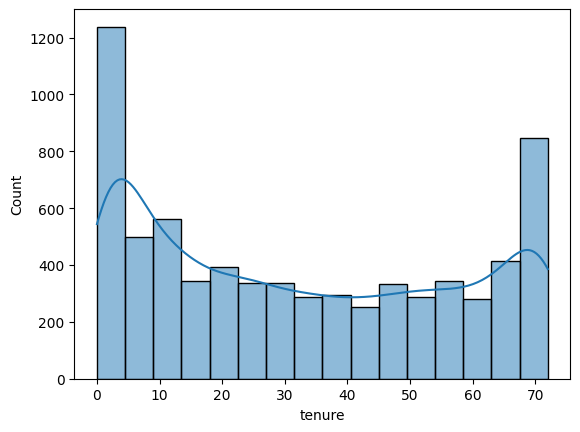

In [25]:
# Histplot and KDE plot of tenure (# of months the customer has stayed with the company) 
sns.histplot(data['tenure'], kde=True) 
plt.show() 


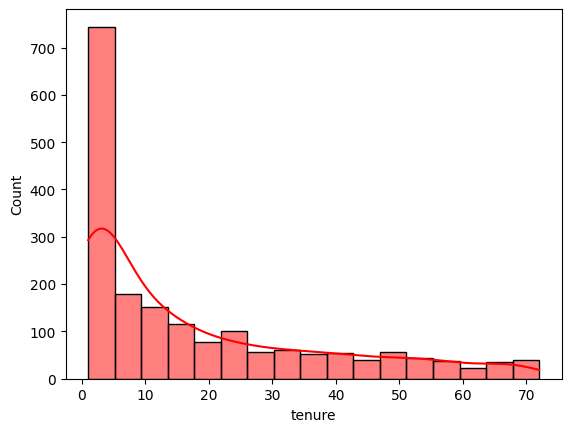

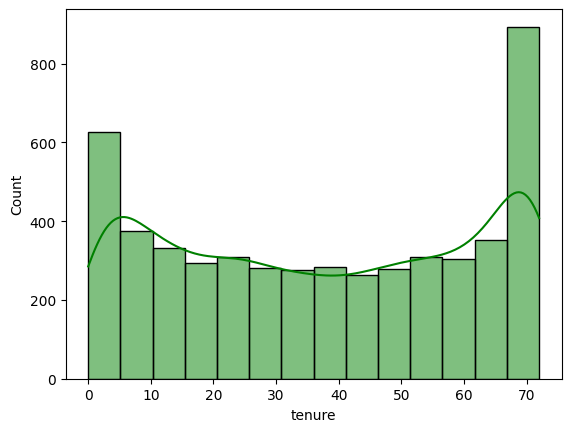

In [28]:
# Histplot and KDE of tenure and churn 
sns.histplot(data[data['churn'] == "Yes"]['tenure'], color='red', kde=True) 
plt.show() 

sns.histplot(data[data['churn'] == "No"]['tenure'], color='green', kde=True) 
plt.show() 


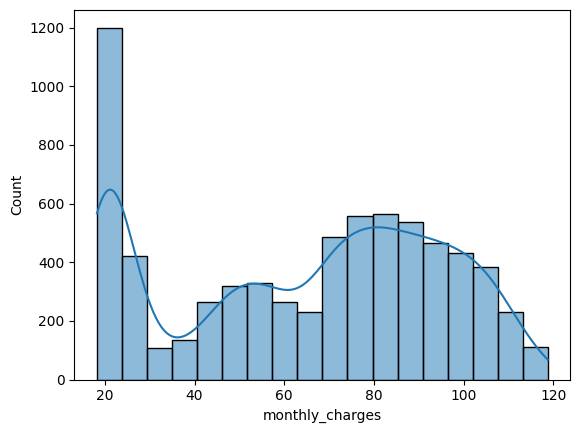

In [26]:
# Histplot and KDE plot of monthly_charges 
sns.histplot(data['monthly_charges'], kde=True) 
plt.show() 


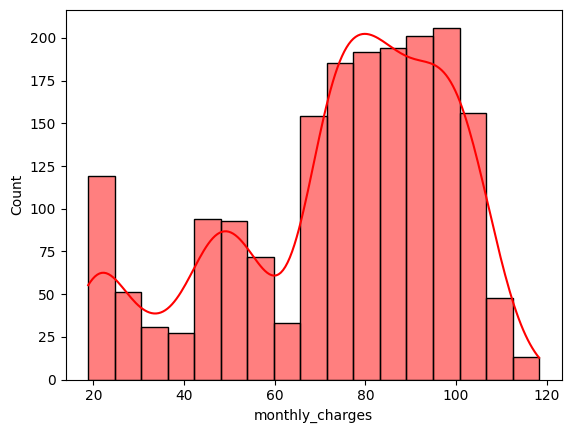

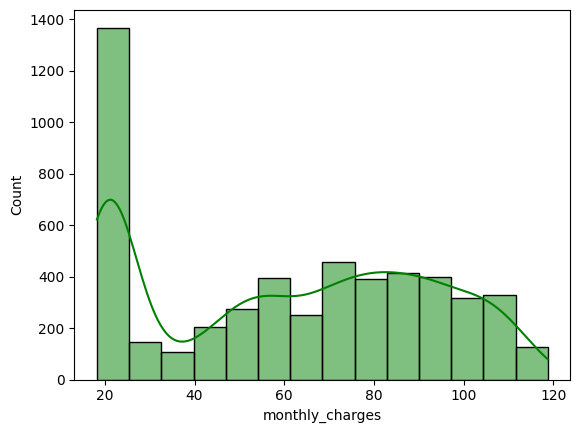

In [29]:
# Histplot and KDE plot of monthly charges and churn 
sns.histplot(data[data['churn'] == "Yes"]['monthly_charges'], color='red', kde=True) 
plt.show() 

sns.histplot(data[data['churn'] == "No"]['monthly_charges'], color='green', kde=True) 
plt.show() 


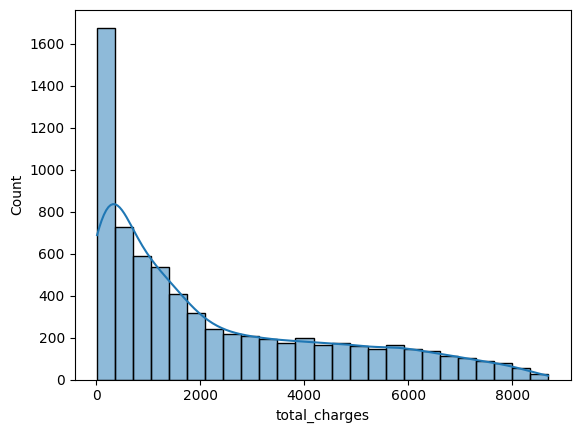

In [27]:
# Histplot and KDE plot of total_charges 
sns.histplot(data['total_charges'], kde=True) 
plt.show() 


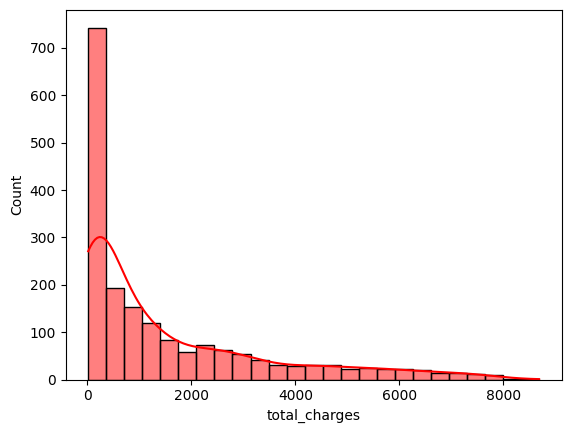

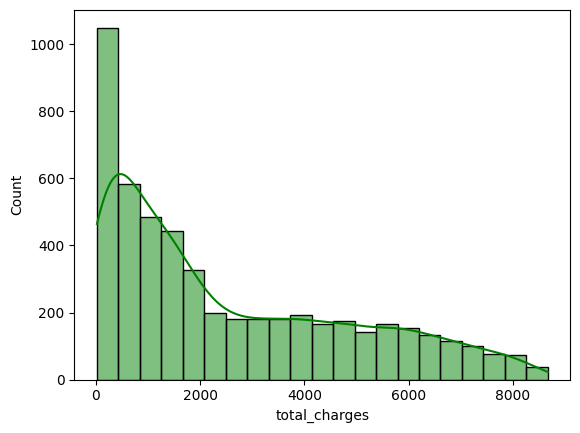

In [30]:
# Histplot and KDE of total_charges and churn 
sns.histplot(data[data['churn'] == "Yes"]['total_charges'], color='red', kde=True) 
plt.show() 

sns.histplot(data[data['churn'] == "No"]['total_charges'], color='green', kde=True) 
plt.show() 


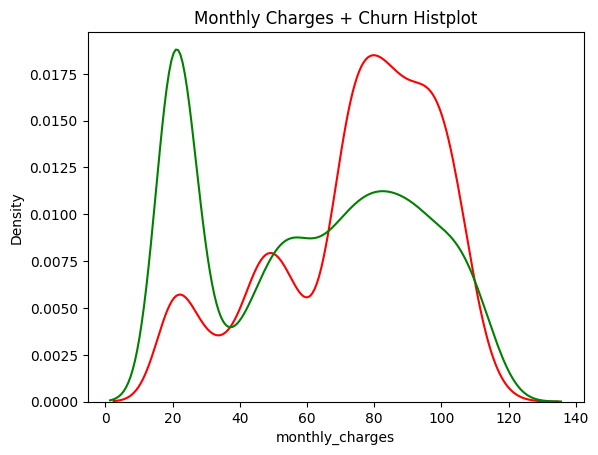

In [ ]:
# Histplot of monthly_charges and churn 
sns.kdeplot(data[data['churn'] == "Yes"]['monthly_charges'], color='red') 
sns.kdeplot(data[data['churn'] == "No"]['monthly_charges'], color='green') 
plt.title('Monthly Charges + Churn Histplot') 
plt.show() 



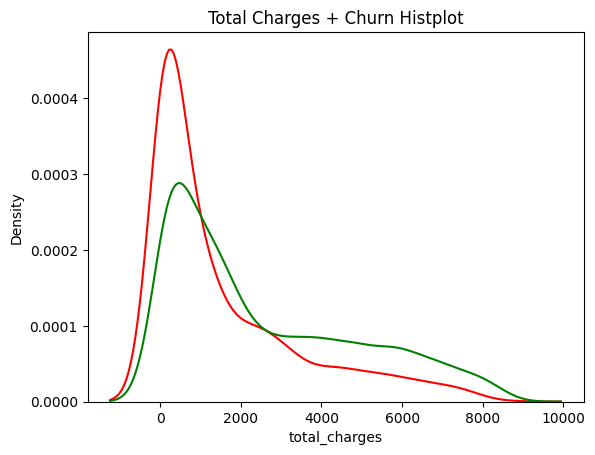

In [23]:
# Histplot of total_charges and churn 
sns.kdeplot(data[data['churn'] == "Yes"]['total_charges'], color='red') 
sns.kdeplot(data[data['churn'] == "No"]['total_charges'], color='green') 
plt.title('Total Charges + Churn Histplot') 
plt.show() 


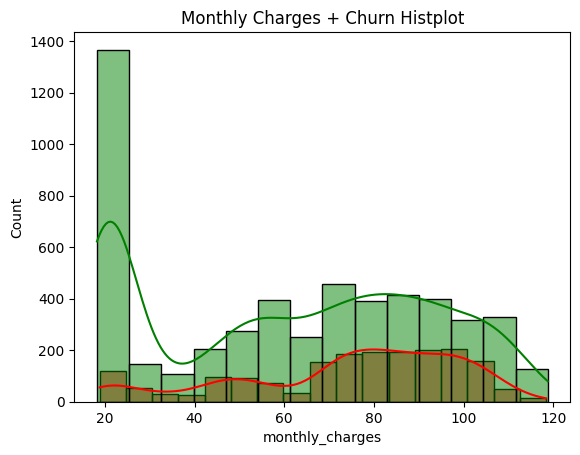

In [24]:
sns.histplot(data[data['churn'] == "Yes"]['monthly_charges'], color='red', kde=True) 
sns.histplot(data[data['churn'] == "No"]['monthly_charges'], color='green', kde=True) 
plt.title('Monthly Charges + Churn Histplot') 
plt.show() 

In [96]:
# Correlation Heatmap 
# Using target encoding to encode categorical variables instead of label encoding. 
# Transforming categorical variables to their mean churn rate 

df = data.copy() 

# Function to encode categorical variables (except customer_id) 
def target_encoding(data, target_column, exclude_columns=None):
    if exclude_columns is None: 
        exclude_columns = [] 
     
    encoded_df = data.copy() 
    # Encoding target variables (churn) 
    if encoded_df[target_column].dtype == "object": 
        unique_values = encoded_df[target_column].unique() 
        if len(unique_values) == 2: 
            mapping = {unique_values[0]: 0, unique_values[1]: 1} 
            encoded_df[target_column] = encoded_df[target_column].map(mapping) 

    # Encoding categorical variables (except customer_id) 
    for col in encoded_df.select_dtypes(include='object').columns: 
        if col not in exclude_columns: 
            means = encoded_df.groupby(col)[target_column].mean() 
            encoded_df[col] = encoded_df[col].map(means) 

    return encoded_df 


encoded_df = target_encoding(df, target_column='churn', exclude_columns=['customer_id']) 
# Dropping customer_id column from encoded_df 
encoded_df = encoded_df.drop(columns=['customer_id']) 
print(encoded_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   float64
 1   senior_citizen     7043 non-null   float64
 2   partner            7043 non-null   float64
 3   dependents         7043 non-null   float64
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   float64
 6   multiple_lines     7043 non-null   float64
 7   internet_service   7043 non-null   float64
 8   online_security    7043 non-null   float64
 9   online_backup      7043 non-null   float64
 10  device_protection  7043 non-null   float64
 11  tech_support       7043 non-null   float64
 12  streaming_tv       7043 non-null   float64
 13  streaming_movies   7043 non-null   float64
 14  contract           7043 non-null   float64
 15  paperless_billing  7043 non-null   float64
 16  payment_method     7043 

In [97]:
# Correlation Matrix 
encoded_corr = encoded_df.corr()['churn'].sort_values(ascending=False) 
encoded_corr 


churn                1.000000
contract             0.410116
online_security      0.347400
tech_support         0.342916
internet_service     0.322455
payment_method       0.303359
online_backup        0.292316
device_protection    0.281580
streaming_movies     0.230951
streaming_tv         0.230502
monthly_charges      0.193356
paperless_billing    0.191825
dependents           0.164221
senior_citizen       0.150889
partner              0.150448
multiple_lines       0.040109
phone_service        0.011942
gender               0.008612
total_charges       -0.199484
tenure              -0.352229
Name: churn, dtype: float64

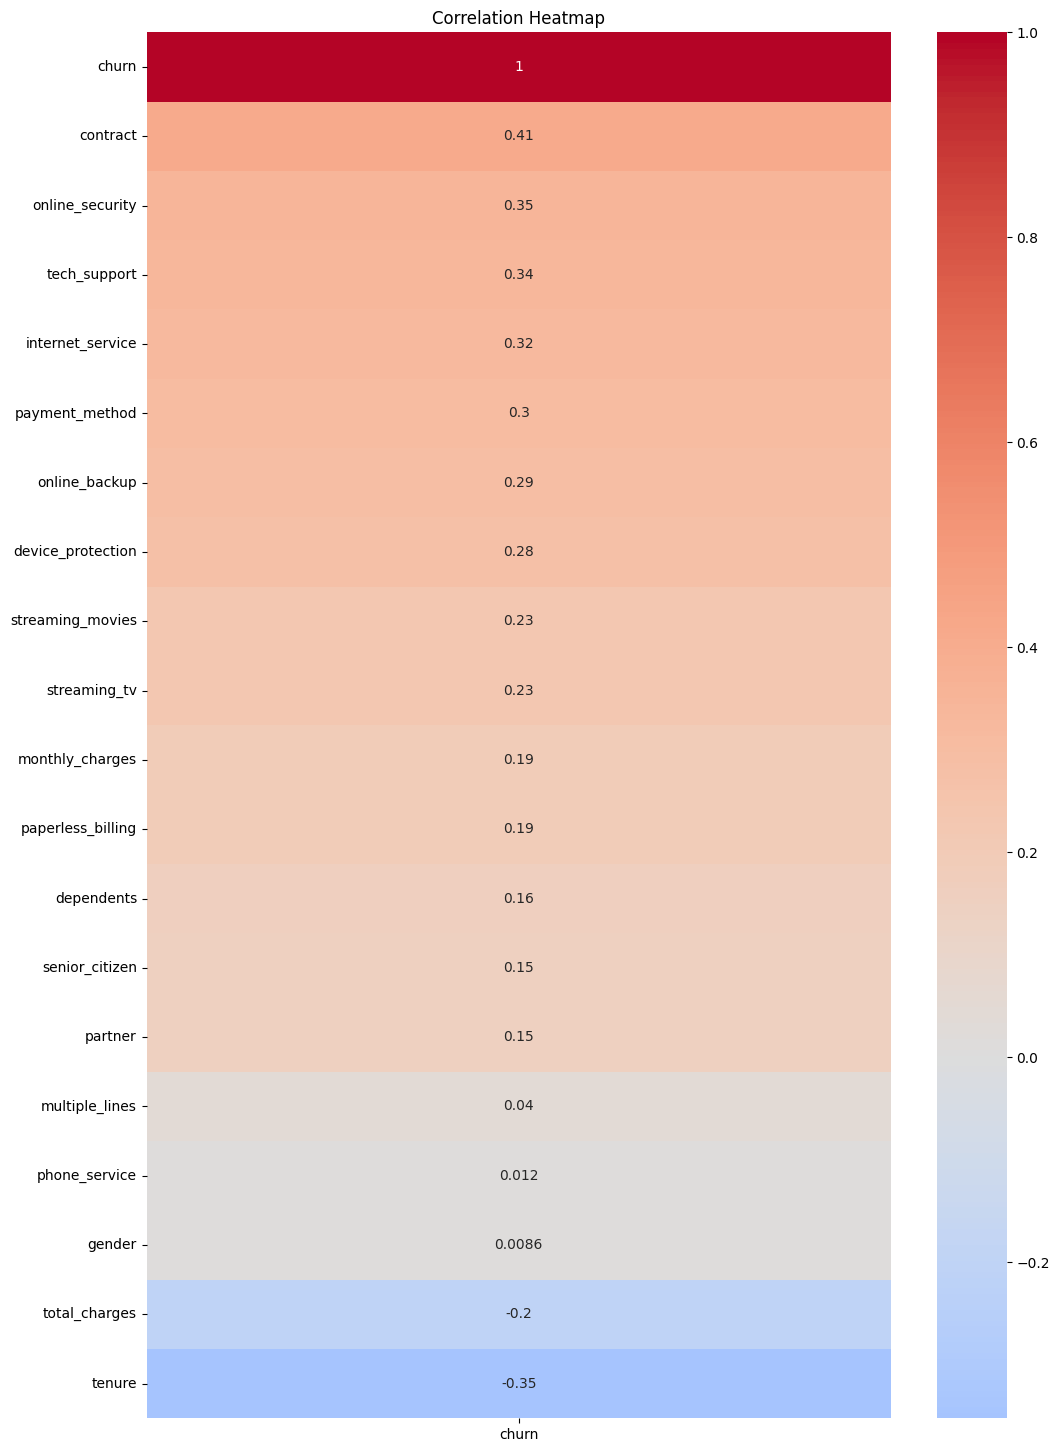

In [98]:
# Plotting heatmap of correlation matrix 
plt.figure(figsize=(12, 18)) 
sns.heatmap(encoded_corr.to_frame(), annot=True, cmap='coolwarm', center=0) 
plt.title("Correlation Heatmap") 
plt.show() 


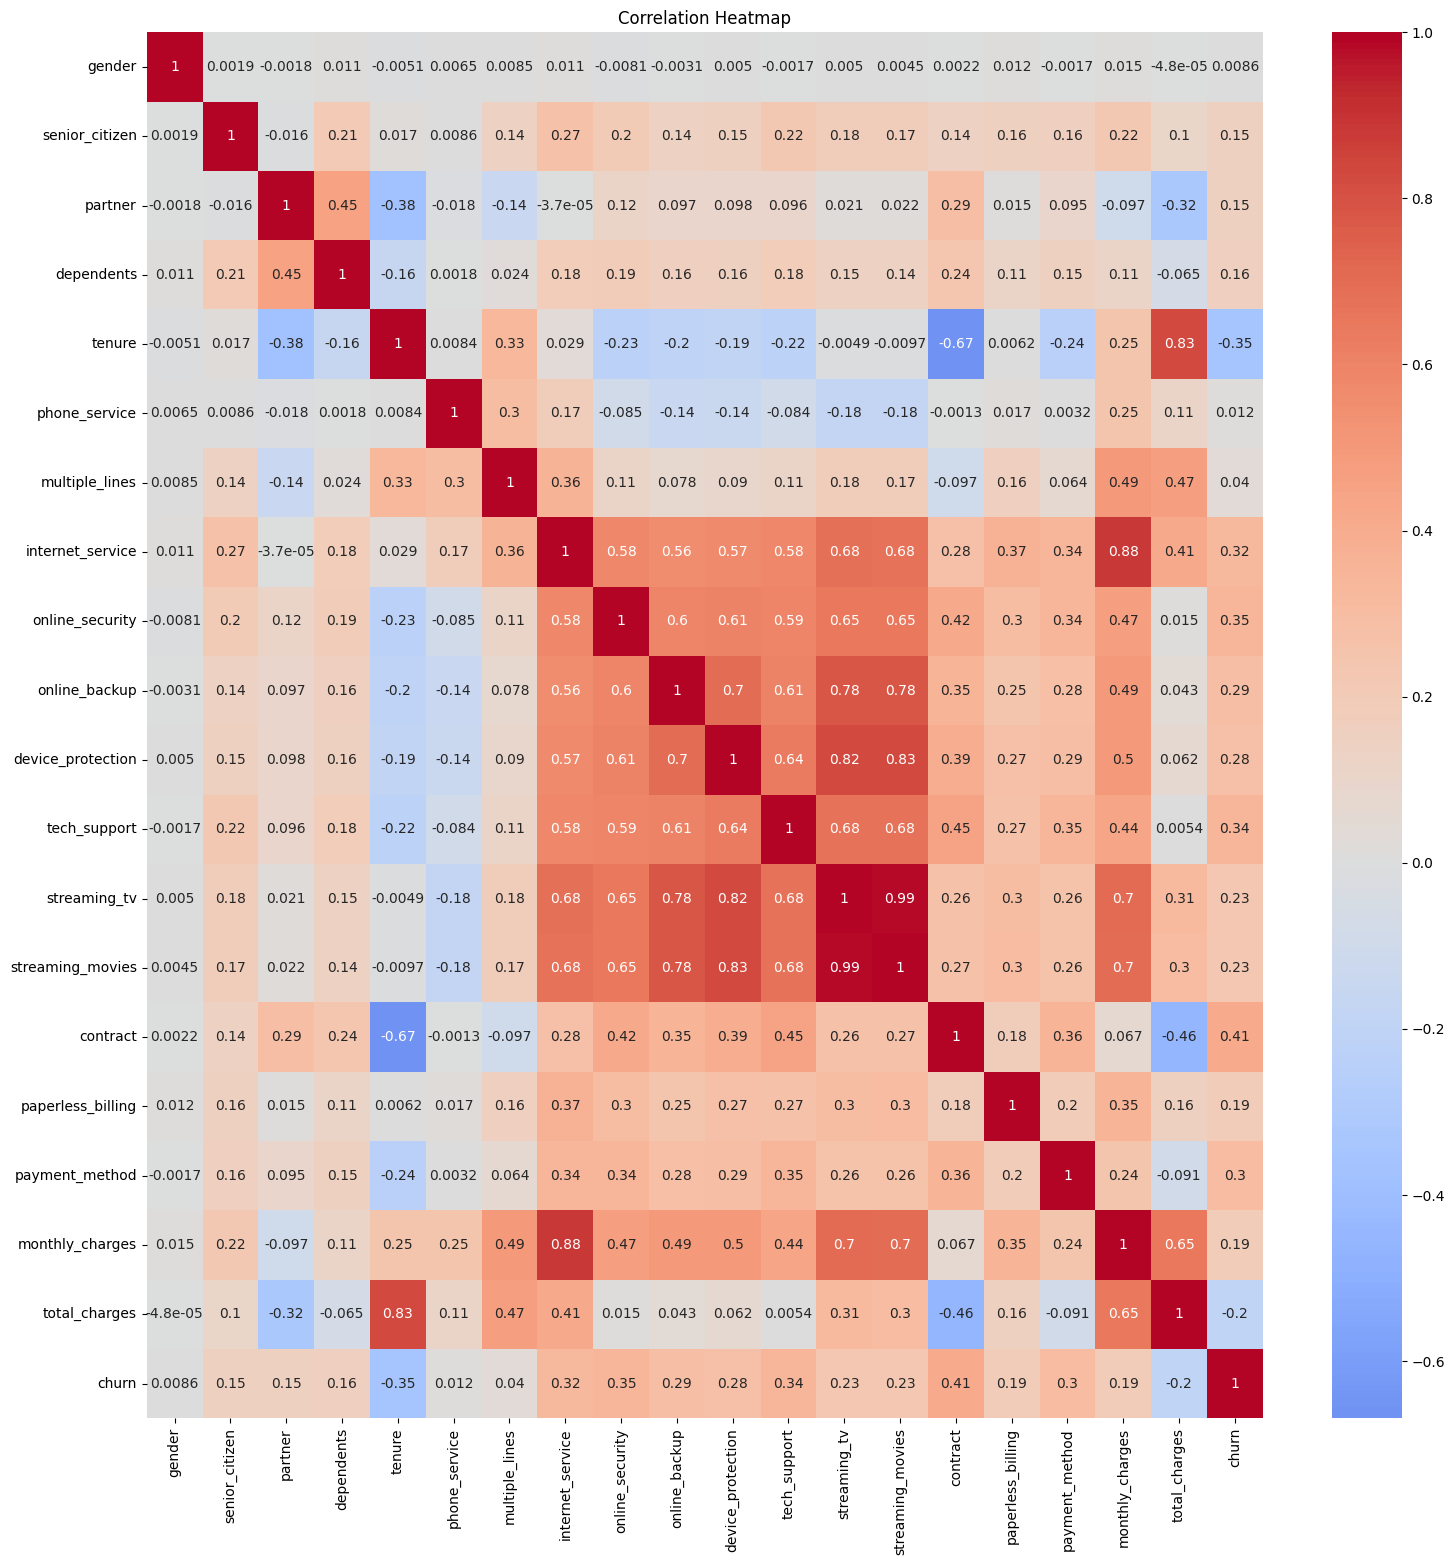

In [100]:
# Full correlation matrix 
corr = encoded_df.corr() 
# Plotting heatmap of correlation matrix 
plt.figure(figsize=(18, 18)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0) 
plt.title("Correlation Heatmap") 
plt.show() 



In [101]:
corr 

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
gender,1.000000,0.001874,-0.001808,0.010517,-0.005106,0.006488,0.008493,0.011038,-0.008065,-0.003076,0.004997,-0.001697,0.004986,0.004523,0.002189,0.011754,-0.001736,0.014569,-0.000048,0.008612
senior_citizen,0.001874,1.000000,-0.016479,0.211185,0.016567,0.008576,0.142306,0.265240,0.199597,0.144608,0.154346,0.218308,0.175812,0.172518,0.142815,0.156530,0.162564,0.220173,0.102411,0.150889
partner,-0.001808,-0.016479,1.000000,0.452676,-0.379697,-0.017706,-0.141599,-0.000037,0.115135,0.096509,0.098332,0.095785,0.021225,0.021631,0.292016,0.014877,0.095333,-0.096848,-0.319072,0.150448
dependents,0.010517,0.211185,0.452676,1.000000,-0.159712,0.001762,0.024421,0.179316,0.193857,0.161184,0.155837,0.180420,0.145084,0.141317,0.240907,0.111377,0.150055,0.113890,-0.064653,0.164221
tenure,-0.005106,0.016567,-0.379697,-0.159712,1.000000,0.008448,0.330225,0.028826,-0.225901,-0.203550,-0.188026,-0.220868,-0.004872,-0.009652,-0.668862,0.006152,-0.238018,0.247900,0.825880,-0.352229
phone_service,0.006488,0.008576,-0.017706,0.001762,0.008448,1.000000,0.297736,0.174280,-0.084564,-0.143335,-0.135780,-0.083955,-0.178342,-0.176920,-0.001342,0.016505,0.003183,0.247398,0.113008,0.011942
multiple_lines,0.008493,0.142306,-0.141599,0.024421,0.330225,0.297736,1.000000,0.364447,0.113470,0.078296,0.090383,0.114014,0.175656,0.172815,-0.096825,0.162927,0.064159,0.492511,0.468604,0.040109
internet_service,0.011038,0.265240,-0.000037,0.179316,0.028826,0.174280,0.364447,1.000000,0.582658,0.557525,0.572644,0.582042,0.680811,0.679101,0.279976,0.368646,0.342268,0.884545,0.413749,0.322455
online_security,-0.008065,0.199597,0.115135,0.193857,-0.225901,-0.084564,0.113470,0.582658,1.000000,0.596359,0.606423,0.590182,0.653531,0.654134,0.415578,0.299175,0.342334,0.467242,0.015389,0.347400
online_backup,-0.003076,0.144608,0.096509,0.161184,-0.203550,-0.143335,0.078296,0.557525,0.596359,1.000000,0.699064,0.607287,0.784584,0.783163,0.352306,0.247391,0.284908,0.493362,0.043250,0.292316


## Notes

**Baseline** 
(Overall churn rate) --> 26.54% 

### Group effects 
**Senior Citizens**: Within-group churn ~41.68% compared to non-senior ~23.65% 
- *Population Impact*: non-seniors still contribute more to the total churn counts despite having lower in-group churn rate. 

**Contract Type**: Large difference between group churn rates 
- Month-to-Month: 42.71% 
- One-Year: 11.27% 
- Two-Year: 2.83% 
*Month-to-Month customers are ~15x more likely to churn than two-year contract customers* 

**Internet Service**: 
- Fiber optic churn: 41.89% 
*Fiber optic customers are ~2.2x more likely to churn than DSL customers* 

**Payment Method**: 
- Electronic Check: 45.29% (Much higher than the other payment methods) 

**Paperless Billing**: 
- Paperless billing customers make up a larger percentage of churning customers 

**Tenure**: Negatively correlated with churn -- longer-tenured customers are less likely to churn. 


### Business Insights based on analysis
**Prioritize customer retention for customers on month-to-month contracts and fiber optic internet service.** These customers have the highest liklihood to churn. 
**Look further into the segment of customers paying with electronic check.** Higher customer churn may be due to issues related to billing. 
**Consider extended contract incentives to convert month-to-month contracts to 1-2 year contracts.**  
**Complete a more in-depth analysis into the causes for senior citizen churn.** While a smaller percentage of the larger population's churn rate, the high in-group churn rate of seniors indicates other factors could be present leading to the increased churn rate. 
**Consider introducing packaged product bundlles instead of separate services.** Cross-tabulation and correlations show that there is a lack of support services (Online Security, Tech Support, etc) being utilized by customers, which is correlated with higher churn rates. Offering these services as a package bundle may incentivize more customers to consider these services. 

<br>

### Additional tests to look into: 
- Chi-square (to look at association strengths) 
- Logistic Regression (to see coefficients across clustered/grouped features) 
- Interactions (testing interactions between different variables) 
- Analyzing feature importance for modeling 
